# Introduction to Libraries

This notebook illustrates the use of Capella Libraries.

When trying to load a model that uses a library, you may encounter an error similar to this:

In [3]:
import capellambse
path_to_model = "../tests/data/Library Project/Library Project.aird"

try:
    capellambse.MelodyModel(path_to_model, jupyter_untrusted=True)
except Exception as err:
    print(f"{type(err).__name__}: {err}")
else:
    print("There should have been an error here ...")

MissingResourceLocationError: 'Library Test'


This tells us the name that was given to the library: `Library Test`. So, we need to define a resource location with that name. As there can be arbitrarily many resource locations (i.e. linked libraries) with arbitrary names given to them, these locations are handed over in a Python `dict`.

There are three ways of defining a resource location:

1. A simple `str` containing only a path or URL, similar to the first positional argument of `MelodyModel`.
2. A nested dictionary with a `path` key, as well as other keys needed to find and access that resource. These may include `subdir` or `username` and `password`.
3. A constructed `FileHandler` object.

The following cell shows a concrete example of each of them.

In [4]:
# Simple `str`
resources = {
    "Library Test": "/data/models/Library Test",
}

# Nested `dict`
resources = {
    "Library Test": {
        "path": "https://raw.githubusercontent.com/DSD-DBS/py-capellambse/master/tests/data/Library%20Test",
        # More options can be added here if necessary, e.g.:
        # "username": "demouser",
        # "password": "super secret passphrase",
    }
}

# `FileHandler` object
# (Be aware that constructing a ´FileHandler` may already involve network access,
# for example cloning a remote git repository into a local cache.)
lib_handler = capellambse.get_filehandler(
    "git+https://github.com/DSD-DBS/py-capellambse.git",
    subdir="tests/data/Library Test",
    revision="master"
    # More options can be added here as well, e.g.:
    # username="demouser",
    # password="super secret passphrase",
)
resources = {"Library Test": lib_handler}

Equipped with this `resources` dictionary, we can now try to load the model again:

In [5]:
model = capellambse.MelodyModel(path_to_model, resources=resources)

Cannot load PVMT extension: ValueError: Provided model does not have a PropertyValuePkg
Property values are not available in this model


If you receive more `MissingResourceLocationError`s, add them to the same `resources` dictionary and pass them to the `MelodyModel` as well.

Once you no longer receive errors during loading, you can use the model as normal.

In [6]:
model.diagrams

<CachedElementList at 0x00007FF9F02D36A0 [<Diagram '[CDB] Library Product'>, <Diagram '[LAB] E-Commerce'>]>

Unknown global filter 'hide.sequencing.information.filter'
Unknown global filter 'hide.simplified.diagram.based.component.exchanges.filter'
Unknown global filter 'hide.simplified.oriented.grouped.component.exchanges.filter'
Unknown global filter 'ModelExtensionFilter'
Unknown global filter 'hide.simplified.group.of.component.exchanges.filter'


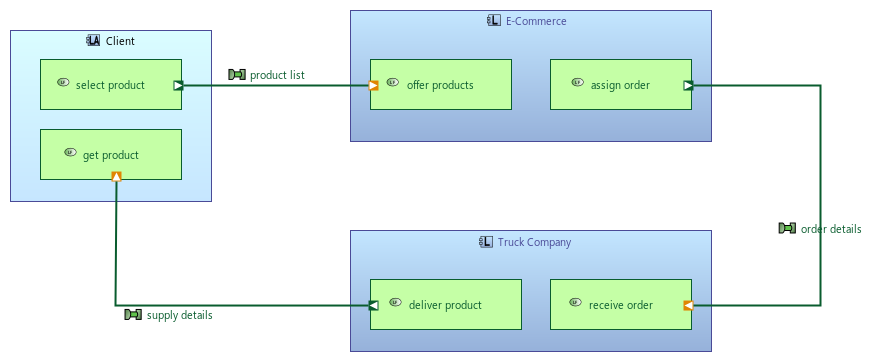

In [7]:
model.diagrams.by_name("[LAB] E-Commerce")

# Common pitfalls

In order for `capellambse` to be able to find your elements, ensure that you:

1. Created a replicable element collection (REC) in the Capella Library. To do that, right-click the element in the library, and choose "REC / RPL" > "Create REC".
2. Have instantiated the REC as a so-called Replica (RPL) in your primary project. For this, right-click any element in your project and choose "REC / RPL" > "Instantiate RPL from REC".

For more information, watch this [short video about REC / RPL](https://youtu.be/h-ax61eVlxM).

In [8]:
for component in model.la.all_components:
    print(component.name)

Logical System
E-Commerce
Truck Company
Client


# Saving a model

You can save the model as usual by calling `model.save()`. However, **this will only save the primary model**. Modifications to elements that are defined only in a library will be lost.

This is normally not a problem when following the standard REC / RPL based workflow, as the definitions of those elements will be copied to and modified in the primary model.

In order to modify elements in one of the used libraries, you can load the library itself as a model. This allows you to apply any needed modifications and then save the library. Afterwards, the updated library can be used in the `resources` of other models.